# <center> ANN_Random_Features

利用单隐含层网络随机得到的特征函数，然后采用`Normal Equation`做线性回归

## 导入必要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 生成数据集

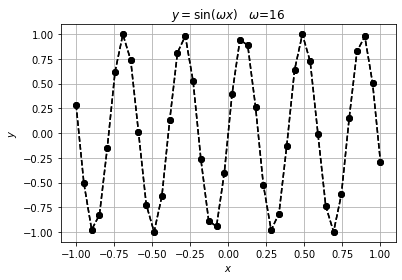

In [3]:
m=40 #样本数
p=16 #待拟合函数的频率

X=np.linspace(-1,1,m).reshape(-1,1)
y=np.sin(p*X)
y=y.reshape(-1,1)
plt.plot(X,y,'k--o')
plt.plot(X,y,'k--o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r"$y=\sin(\omega x)$"+"   "+r"$\omega$"+"="+str(p))
plt.grid(True)

## 定义相关函数

In [18]:
def sigmod(x):
    return 1/(1+np.exp(-x))

#三层网络
width=1000
Omega_width=2

input_dimension=1
hidden_layer_1_diemension=width
output_dimension=1

np.random.seed(40) # 固定初始权重，使每次学习结果都一样

# 初始化权重
Omega1_ran=np.random.randn(input_dimension+1,hidden_layer_1_diemension)*Omega_width

#定义三层网络的特征函数
def fn_ran(X):
    a1=X
    a11=np.insert(a1,0,values=1,axis=1)
    Z2=np.dot(a11,Omega1_ran)
    a2=sigmod(Z2)
    return a2


## 画出特征函数

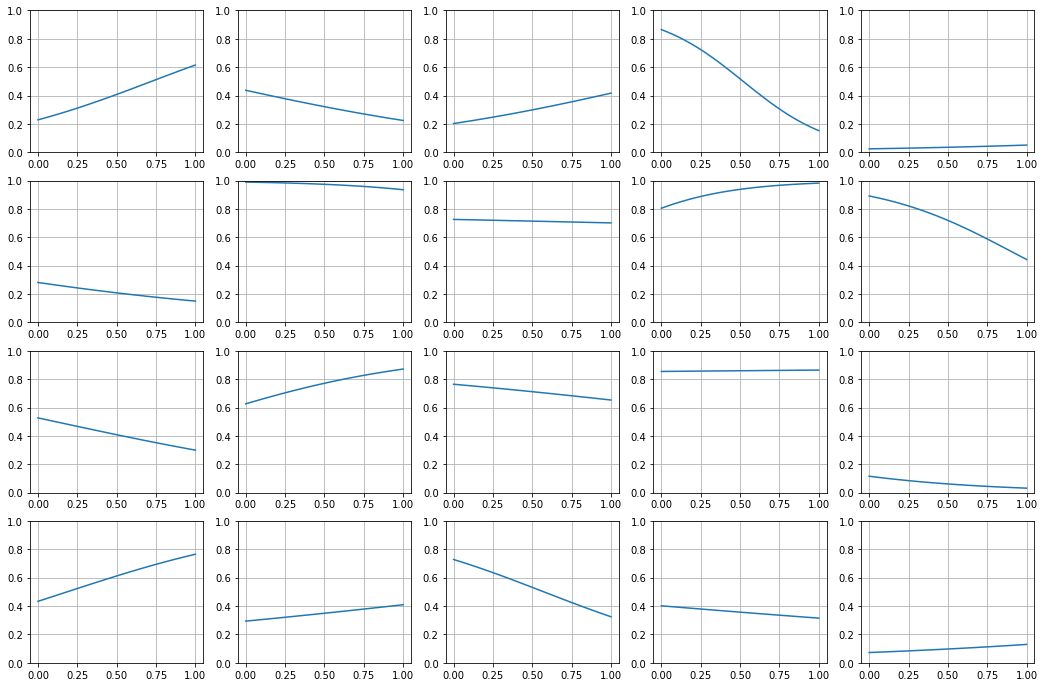

In [15]:
xx=np.linspace(0,1,50).reshape(-1,1)
yy=fn_ran(xx)
n=Omega1_ran.shape[1]
plt.figure(figsize=(18,12))
for i in np.arange(0,20):
    plt.subplot(4,5,i+1)
    plt.plot(xx,yy[:,i])
    plt.ylim(0,1)
    plt.grid(True)
    

## 用Normal Equation进行训练

In [16]:
a2=fn_ran(X)

a21=np.insert(a2,0,values=1,axis=1)

A=a21
C=np.dot(A.T,A)
B=np.linalg.pinv(C)
D=np.dot(B,A.T)
OMega2_Norm=np.dot(D,y)

## 训练结果

TRaining RMSE: 0.0037721894008001123


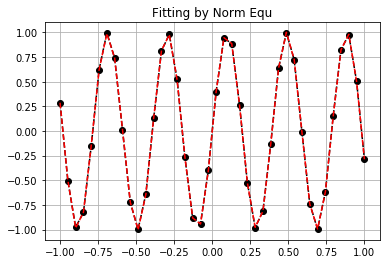

In [17]:
a3_Norm=np.dot(a21,OMega2_Norm)
print("TRaining RMSE:",np.sqrt(np.dot((a3_Norm-y).T,(a3_Norm-y))/m).item())
plt.title("Fitting by Norm Equ")
plt.plot(X,y,'k--o')
plt.plot(X,a3_Norm,'r--')
plt.grid(True)